
# WhatsApp Message Exploratory Data Analysis(EDA)


# Out-line
- Introduction.
- Data Retrieval. 
- Data Preparation and Cleaning.
- Business & Data understanding.
- Exploratory Data Analysis(EDA)
- Conclusion.


**“Understand more on ourselves through analysis”**

**Introduction**

The reason why I choose WhatsApp as my analysis is because I always wanted to know more about my chat room behaviour. And after reading some of the notebooks from Prajwal Prashanth at Jovian.ml.  
In this project, I will attempt to find out what normally I will do in a group chat with my friends such as the active hours we usually talk and the number of emoji we use in the chat. Let get started!

## The dataset in use:

In this analysis, we are using the personal dataset from Whatsapp chat. Everyone is able to export their own dataset from the Whatsapp group:


Before I start my analysis there is some item that you need to take noted. This dataset is from real-life chat that was created during the 24/08/2021 till 05/02/2022 period. And the main purpose of this group is to exchange knowledge and ideas during our online college life

## 1. Import Basics library & Read the Dataset


Here we will start importing some library to use in our dataset
Then we will use pandas or pd.read to read the text file

In [28]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Data understanding
Before we start any analysis we need to understand the Business and the data side:
# Data Understanding:
In here we can see there are 5 columns in the dataset
only 0th column contains all the data date time and user and message
After knowing there is an unknown value in the dataset and inbalance row we now can clear the data

In [98]:
whatsapp_df = pd.read_fwf('D:\WhatsApp Chat with Data Science OP✨🎩.txt', header = None)

whatsapp_df

,0,1,2,3,4
0,"8/24/21, 10:00 AM - +91 76669 32581: dekhna ir...",NaN,NaN,NaN,NaN
1,"8/24/21, 10:00 AM - Daksh DJSCE: ✅",NaN,NaN,NaN,NaN
2,"8/24/21, 10:00 AM - +91 99670 69299: Baki batao",NaN,NaN,NaN,NaN
3,"8/24/21, 10:00 AM - Prachet Shah Djsce: Which ...",wavenumber than visible light.,NaN,NaN,NaN
4,"8/24/21, 10:00 AM - +91 77387 35184: <Media om...",NaN,NaN,NaN,NaN
...,...,...,...,...,...
47320,"2/5/22, 12:26 PM - Arihant Sheth DJSCE: and mo...",NaN,NaN,NaN,NaN
47321,"2/5/22, 12:26 PM - Arihant Sheth DJSCE: toh ye...",NaN,NaN,NaN,NaN
47322,"2/5/22, 12:27 PM - Pramit DJSCE: .",NaN,NaN,NaN,NaN
47323,"2/5/22, 12:27 PM - Arihant Sheth DJSCE: thank ...",NaN,NaN,NaN,NaN


***Below i created a fuction converting whatsapp text file to a dataframe***

In [29]:
def txttodff(text):
    user=[]
    messages=[]
    time=[]
    date=[]
    datetime=[]
    timepat=r",\s(\d+:\d+\s\w+)"
    result1= re.findall(timepat,text)
    for i in result1:
        time.append(i)
    datepat=r"\d+/\d+/\d+"
    result2= re.findall(datepat,text)
    for i in result2:            
        date.append(i)
    patforuser=r"- (\w+)|- [+]91\s(\d{5}\s\d{5})"
    result3= re.findall(patforuser,text)
    for i in result3:
        if(i[0]):
            user.append(i[0])
        if(i[1]):
            user.append(i[1])
    patformes=r": (.*)"
    result4= re.findall(patformes,text)
    for i in result4:
        messages.append(i)
    datetpat=r"(\d/\d+/\d+), (\d+:\d+\s\w+)"
    monthpat=r"\d+/(\d+)"
    month=re.findall(monthpat,text)
    result5= re.findall(datetpat,text)
    month= [int(i) for i in month]
    j=0
    for i in result5:
        if(month[j]<10):
            datetime.append(i[0][:4]+"20"+i[0][4:]+' '+i[1])       
        else:
            datetime.append(i[0][:4]+'/'+"20"+i[0][5:]+' '+i[1])  
        j=j+1                
    df = pd.DataFrame(zip(time,date,user,messages,datetime), columns=['time','date', 'user', 'messages','datetime'])
    return df
    

In [100]:
with open('D:\WhatsApp Chat with Data Science OP✨🎩.txt','rb') as file:
    text=file.read().decode('utf-8')
    
whatsapp_df=txttodff(text)
whatsapp_df


,time,date,user,messages,datetime
0,10:00 AM,8/24/21,76669 32581,dekhna ir ke column mai,8/24/2021 10:00 AM
1,10:00 AM,8/24/21,Daksh,✅,8/24/2021 10:00 AM
2,10:00 AM,8/24/21,99670 69299,Baki batao,8/24/2021 10:00 AM
3,10:00 AM,8/24/21,Prachet,Which of the following statements is correct -...,8/24/2021 10:00 AM
4,10:00 AM,8/24/21,Infrared,<Media omitted>,8/24/2021 10:00 AM
...,...,...,...,...,...
39994,2:33 PM,2/4/22,Stavan,Ha pracs same hi hoga pretty much,2/5/2022 12:26 PM
39995,2:50 PM,2/4/22,93218 87659,Datasets diff,2/5/2022 12:26 PM
39996,2:50 PM,2/4/22,Stavan,Dataset alag hai toh questions diff ho jayenge,2/5/2022 12:27 PM
39997,3:09 PM,2/4/22,93218 87659,creativity😂,2/5/2022 12:27 PM


In [31]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      39999 non-null  object
 1   date      39999 non-null  object
 2   user      39999 non-null  object
 3   messages  39999 non-null  object
 4   datetime  39999 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [101]:

whatsapp_df['datetime']=pd.to_datetime(whatsapp_df.datetime,format = '%m/%d/%Y %I:%M %p',errors='coerce')
whatsapp_df['datetime']
# Dtype of datetime column converted to datetime64[ns]

0       2021-08-24 10:00:00
1       2021-08-24 10:00:00
2       2021-08-24 10:00:00
3       2021-08-24 10:00:00
4       2021-08-24 10:00:00
                ...        
39994   2022-02-05 12:26:00
39995   2022-02-05 12:26:00
39996   2022-02-05 12:27:00
39997   2022-02-05 12:27:00
39998   2022-02-05 12:28:00
Name: datetime, Length: 39999, dtype: datetime64[ns]

Dtype of datetime column converted to datetime64[ns]

In [33]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      39999 non-null  object        
 1   date      39999 non-null  object        
 2   user      39999 non-null  object        
 3   messages  39999 non-null  object        
 4   datetime  28717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.5+ MB


# Cleaning the image data
After we are done cleaning the columns data, now we must make sure to clear all the image/media data because we are not going use that as our data analysis questions. Since we want to do analysis on the text rather than the image so we have to clean the image data in the text file. The below diagram is showing how to drop the image file.


In [35]:
# To understand the number od the image data

img = whatsapp_df[whatsapp_df['messages'] == "<Media omitted>" ]
img.shape

(2958, 5)

In [102]:
#before
whatsapp_df.shape

(39999, 5)

In [112]:
# We will drop all the image file by using the Drop functions
whatsapp_df.drop(img.index, inplace=True)


In [111]:
#after
whatsapp_df.shape

(37041, 5)

# 3. Let get started on the Exploratory Data Analysis(EDA)

### Question 1: Which users have the most Chat/messages in the group?

In any WhatsApp analysis, we always want to know which user normally chat the most in the group. This help as we determine the most active person in the chat group.

In [110]:
whatsapp_df.user.value_counts()


Pramit       3955
Aditya       3634
Daksh        3581
Saksham      2473
Prachet      2265
             ... 
data            1
very            1
based           1
The             1
Dеcrеɑsеd       1
Name: user, Length: 193, dtype: int64

### Using pandas:
As you can see we can use pandas to understand the data and even sort the data in ascending order. Now we will be able to see the most message or chat in the group is “Pramit”

In [38]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['messages'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'date', inplace = True)
whatsapp_df1.drop(columns = 'time', inplace = True)


#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df1 = whatsapp_df1.groupby('user')['messages'].count().sort_values(ascending = False).reset_index() 
whatsapp_df1=whatsapp_df1[0:9]
whatsapp_df1

,user,messages
0,Pramit,3955
1,Aditya,3634
2,Daksh,3581
3,Saksham,2473
4,Prachet,2265
5,Umang,2057
6,Aryan,1745
7,Stavan,1602
8,Jay,1576


### Data Visualization:
We are going to use the plot and bar chart for our data visualization. As you can see the results have shown us the most number of messages is by users call “Pramit” that is around 4k and this show “Pramit” is a very active member in the group

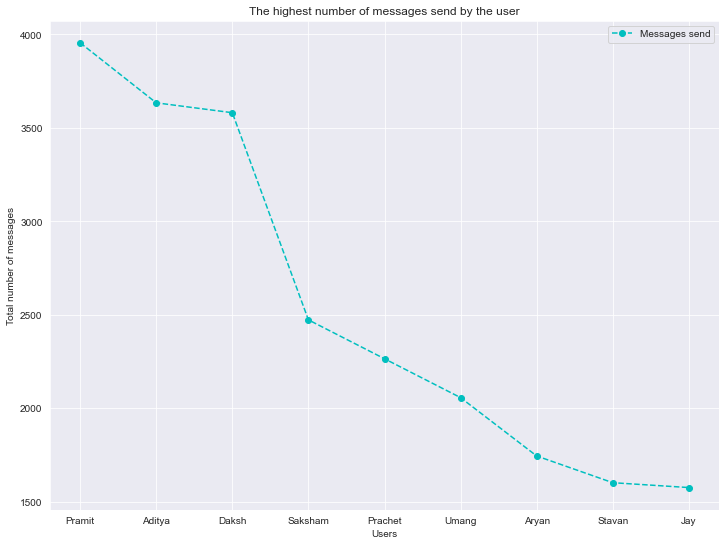

In [39]:
#  Using seaborn for Styles 
sns.set_style("darkgrid")

# Resize the  figure size
plt.figure(figsize=(12, 9))

# Here we are ploting the line chart using plt.plot 
plt.plot(whatsapp_df1.user, whatsapp_df1.messages, 'o--c')  
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("The highest number of messages send by the user")
plt.legend(['Messages send']);
# fig, ax = plt.subplots()
# ax.annotate('x', xy=(0.93, -0.01), ha='left', va='top', xycoords='axes fraction', weight='bold', style='italic')

# In here we are writing the Labels and Title for the plot chart



C:\Users\91889\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


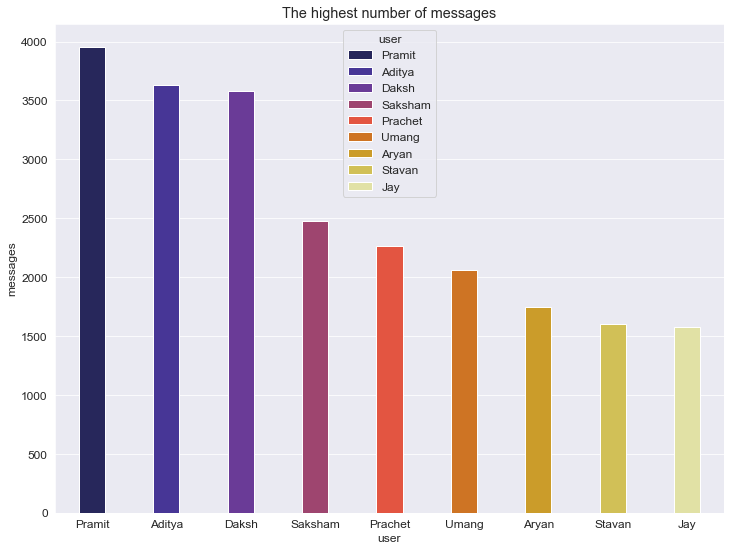

In [40]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(whatsapp_df1.user,whatsapp_df1.messages,hue='user',data=whatsapp_df1,dodge=False,palette="CMRmap")

#The title of our charts
plt.title("The highest number of messages")

#Change the width of the bar chart plot
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.show()

### Question 2: Which emojis use the most by which users?
Now we want to know which emoji is used widely by the user and from the analysis, we can do an assumption that user will most likely to use emoji again in the other chat.

In [41]:
#Copy a dataset
whatsapp_df2 = whatsapp_df.copy()
 
#Count the number of emoji
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys()) #UNICODE_EMOJI class have a thee emoji code inside
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["messages"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1
    
    
   
    
   

In [42]:
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI['en'].keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for index, row in whatsapp_df2.iterrows():
  emojis_found = r.findall(row['messages'])
  for emoji_f in emojis_found:
    emoji_counter[emoji_f] +=1
emojii=[]
count_emj=[]
for item in emoji_counter.most_common(10):
    emojii.append(item[0])
    count_emj.append(item[1])
    print(f'{item[0]} - {item[1]}')


😂 - 5993
🥳 - 1327
🎉 - 762
😭 - 555
🔥 - 472
✨ - 355
🥲 - 299
👍 - 281
🏻 - 253
🙏 - 225


### Using pandas:
As the result, you are able to see the most emoji are used in the WhatsApp group is ***Face with Tears of Joy***

In [43]:
#This will help to create or rendered the emoji 
emojis_df = pd.DataFrame() #The reason to use pd.dataframe is we want to put the emojis_df into the dataframe tables
emojis_df['emoji'] =emojii
emojis_df['number_of_Emoji'] = count_emj
 
emojis_df

,emoji,number_of_Emoji
0,😂,5993
1,🥳,1327
2,🎉,762
3,😭,555
4,🔥,472
5,✨,355
6,🥲,299
7,👍,281
8,🏻,253
9,🙏,225


### Data Visualization:
As you can see on the results, the most widely use emoji among the  users is Face with ***Tears of Joy*** that stand around 57% from the overall. So we can agree that most of the time the user will use Face with Tears of Joy Emoji in this group chat

In [44]:
#This pei chart give us and ideas the overall view of which emoji use the most
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Question 3: The Most active hour in WhatsApp
In this analysis, it helps us to understand what is the hours where all the member is very active in WhatsApp. We will depend on two variable on is the number of messages and the hours. Then we will able to know when is the most active hours


### Using pandas:
In this data frame, the most active hours use in WhatsApp is 10:00hrs


In [118]:
#Copy a dataframe
whatsapp_df3 = whatsapp_df.copy()

whatsapp_df3['hours'] = whatsapp_df3['datetime'].apply(lambda x: x.hour)

time_df = whatsapp_df3.groupby('hours').count().reset_index().sort_values(by = 'hours')
time_df.drop(columns=['user','time','date'],inplace=True)

time_df



,hours,messages,datetime
0,0.0,320,320
1,1.0,97,97
2,2.0,39,39
3,3.0,4,4
4,4.0,1,1
5,5.0,5,5
6,6.0,7,7
7,7.0,41,41
8,8.0,687,687
9,9.0,3370,3370


### Data Visualization:
In this analysis we are able to found the most active hours in WhatsApp is 10:00 hours
Surprisingly we found that between the time period of 5 till 7 am there is no user are active during that time but we can agree between 12 till 2 am there is still user who is active for the past 6 months. So I will assume most of the user are a late sleeper.

C:\Users\91889\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



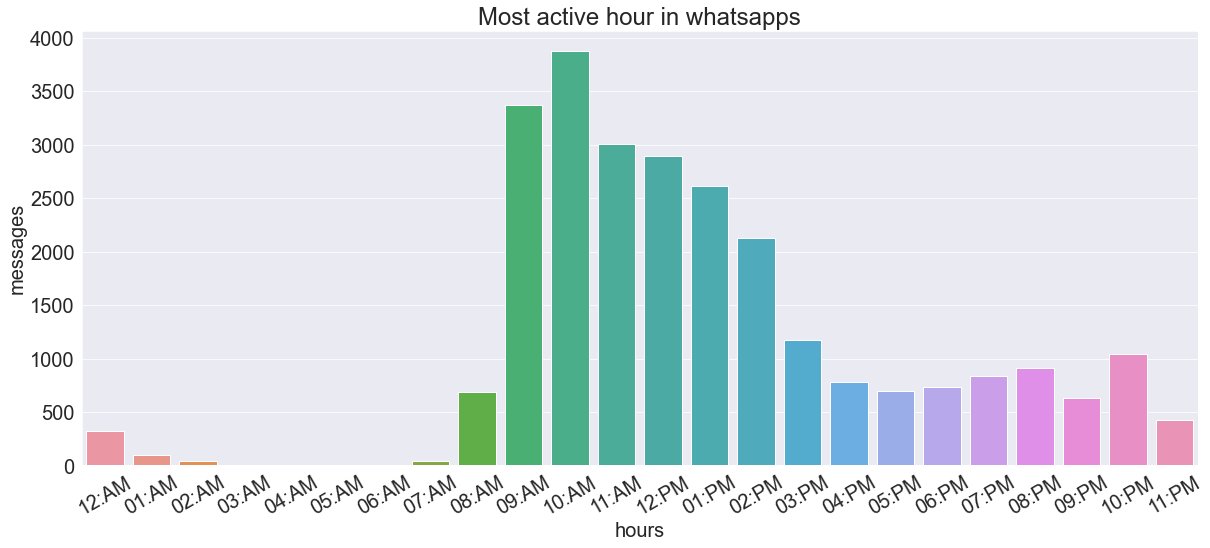

In [119]:
#Create the formatting of the graph 
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)


# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps')
labels=["12:AM","01:AM","02:AM","03:AM","04:AM","05:AM","06:AM","07:AM","08:AM","09:AM","10:AM","11:AM","12:PM","01:PM","02:PM","03:PM","04:PM","05:PM","06:PM","07:PM","08:PM","09:PM","10:PM","11:PM"]

sns.barplot(time_df.hours,time_df.messages,data = time_df,dodge=False)

plt.xticks([i for i in range(24)], labels=labels, rotation=30)
plt.show()



# Question 4: Determine which word or text did the user use the most?

In here we are going to use a word cloud to visual representation of word in the chat and determine which word is widely use by the user? The reason behide this  analysis is to understand the user behaviors. Why do we say so? Because if the word is repeating use we can say that the user will more likely to use the particular or text again in the other chat.

In [95]:
whatsapp_df4= whatsapp_df.copy()



## Data Visualization:
here in code i also added some hindi stopwords which frequently used.
As you can see the most word we use is “kya”.this also a hindi word,which means what.you can also see the happy birthday,because everybody wishes happy birthday to everyone.assignment and lec also most used ,because this chat is of engineering students.


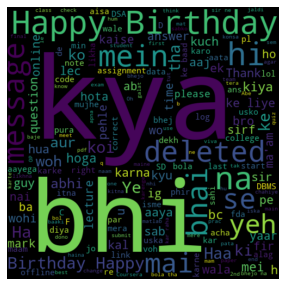

In [122]:
#Each of the word in the message will be review
word = " ".join(review for review in whatsapp_df5.messages)

stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","tu",'ka','hai','toh','nahi',"or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya"])

#Creating a word cloud 
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

